In [104]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sn
import datetime

In [105]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [106]:
df = pd.concat([train_data,test_data],sort = False)
df.tail(5)

,date,store,item,sales,id
44995,2018-03-27,10,50,NaN,44995.0
44996,2018-03-28,10,50,NaN,44996.0
44997,2018-03-29,10,50,NaN,44997.0
44998,2018-03-30,10,50,NaN,44998.0
44999,2018-03-31,10,50,NaN,44999.0


In [107]:
df['date'] = pd.to_datetime(df.date)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    958000 non-null  datetime64[ns]
 1   store   958000 non-null  int64         
 2   item    958000 non-null  int64         
 3   sales   913000 non-null  float64       
 4   id      45000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 43.9 MB


In [109]:
df['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

In [110]:
df.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

**Descriptive Statistics & Exploratory Data Analysis**

In [111]:
store_stat = df.groupby(['store']).agg({'sales': ['count','sum','min', 'max', 'mean', 'median', 'std']})
store_stat

sales                                                    
       count        sum  min    max       mean median        std
store                                                           
1      91300  4315603.0  1.0  155.0  47.268379   44.0  24.006252
2      91300  6120128.0  3.0  231.0  67.033165   62.0  33.595810
3      91300  5435144.0  3.0  196.0  59.530602   55.0  29.974102
4      91300  5012639.0  4.0  186.0  54.902946   51.0  27.733097
5      91300  3631016.0  2.0  130.0  39.770164   37.0  20.365757
6      91300  3627670.0  0.0  134.0  39.733516   37.0  20.310451
7      91300  3320009.0  1.0  122.0  36.363735   34.0  18.684825
8      91300  5856169.0  4.0  204.0  64.142048   60.0  32.231751
9      91300  5025976.0  4.0  195.0  55.049025   51.0  27.832186
10     91300  5360158.0  3.0  187.0  58.709288   54.0  29.554994

In [112]:
item_stat = df.groupby(['item']).agg({'sales': ['count','sum','min', 'max', 'mean', 'median', 'std']})
item_stat.head()

sales                                                    
      count        sum  min    max       mean median        std
item                                                           
1     18260   401384.0  1.0   59.0  21.981599   21.0   8.468922
2     18260  1069564.0  9.0  150.0  58.574151   56.0  20.093015
3     18260   669087.0  7.0  104.0  36.642223   35.0  13.179441
4     18260   401907.0  0.0   66.0  22.010241   21.0   8.403898
5     18260   335230.0  1.0   50.0  18.358708   18.0   7.265167

In [113]:
store_sum = df.groupby(["store"], as_index = False).agg({'sales': 'sum'}).sort_values(by='sales',ascending = False)


<AxesSubplot:xlabel='store', ylabel='sales'>

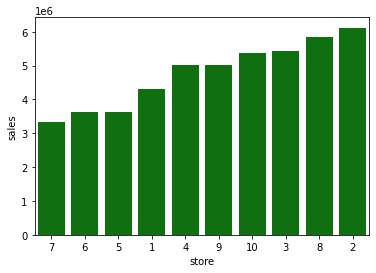

In [114]:
sn.barplot(data=store_sum,x='store',y='sales',color="green",order=store_sum.sort_values('sales').store)

<AxesSubplot:xlabel='item', ylabel='sales'>

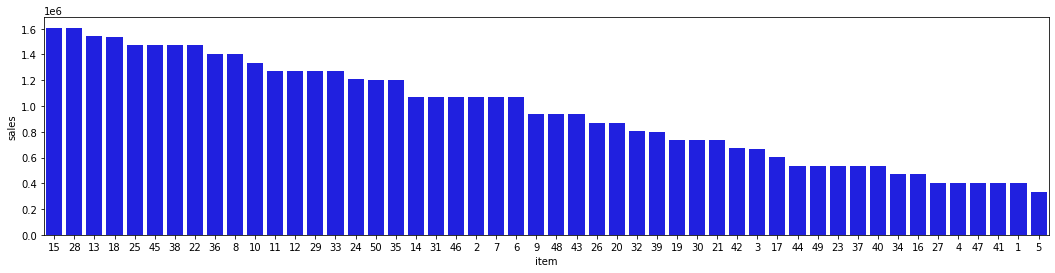

In [115]:
sales_by_item = df.groupby(["item"], as_index = False).agg({'sales':'sum'}).sort_values(by='sales', ascending = False)
plt.figure(figsize =(18,4))
sn.barplot(data = sales_by_item, x = 'item', y ='sales', color = 'blue', order = sales_by_item.sort_values(by='sales', ascending = False).item)

In [116]:
item_sales_per_store = df.groupby(["store", "item"],as_index =False)['sales'].sum()
item_sales_per_store.head(5)

,store,item,sales
0,1,1,36468.0
1,1,2,97050.0
2,1,3,60638.0
3,1,4,36440.0
4,1,5,30335.0


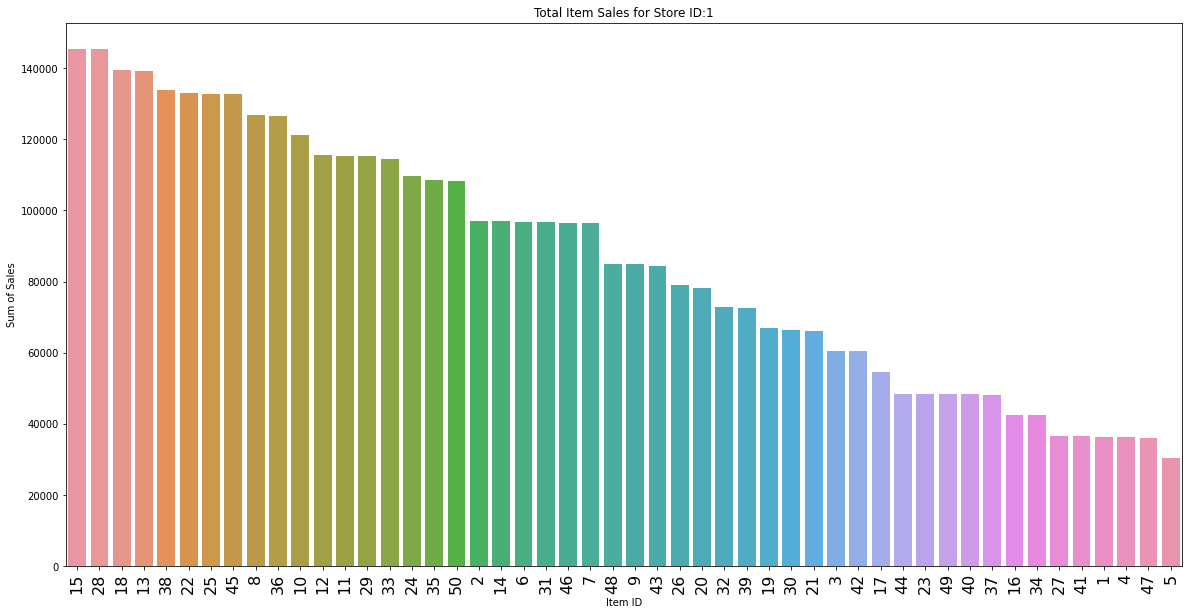

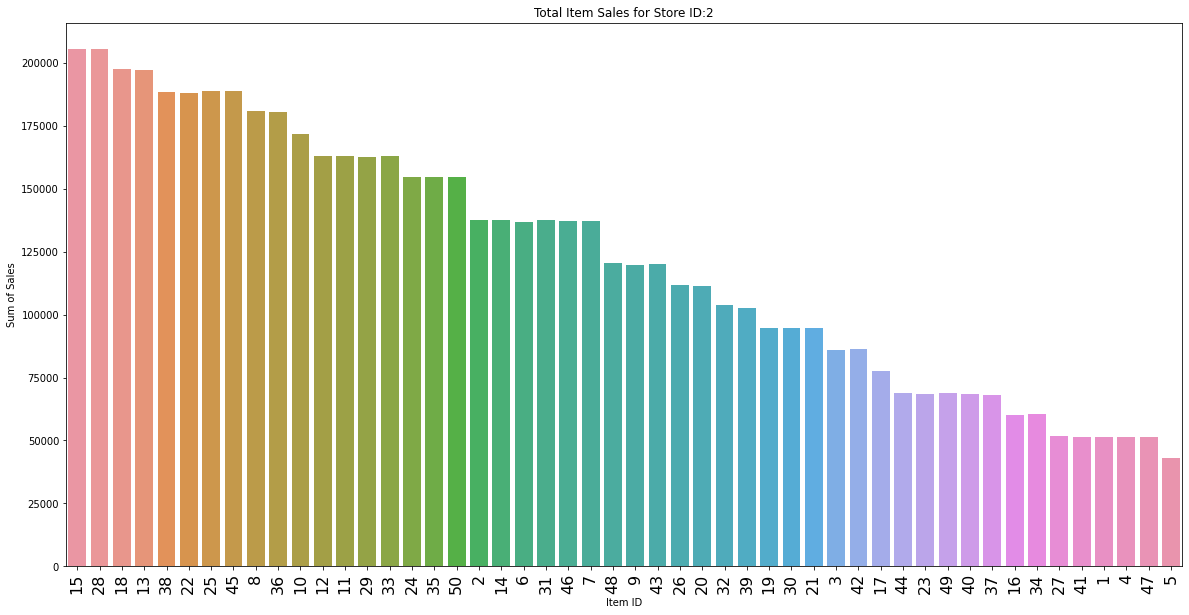

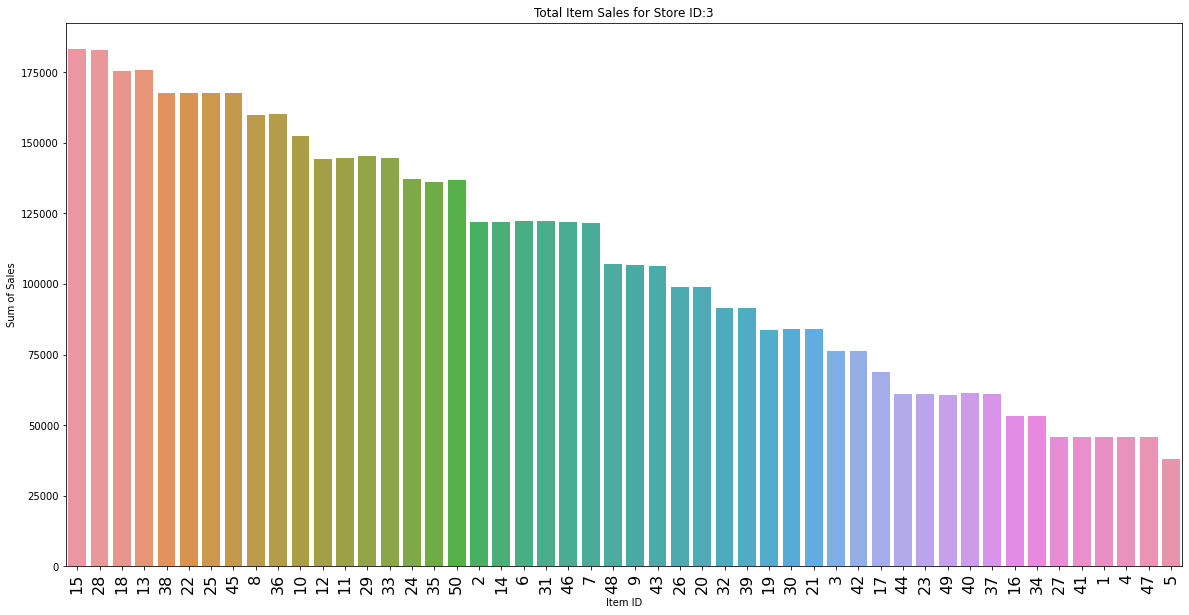

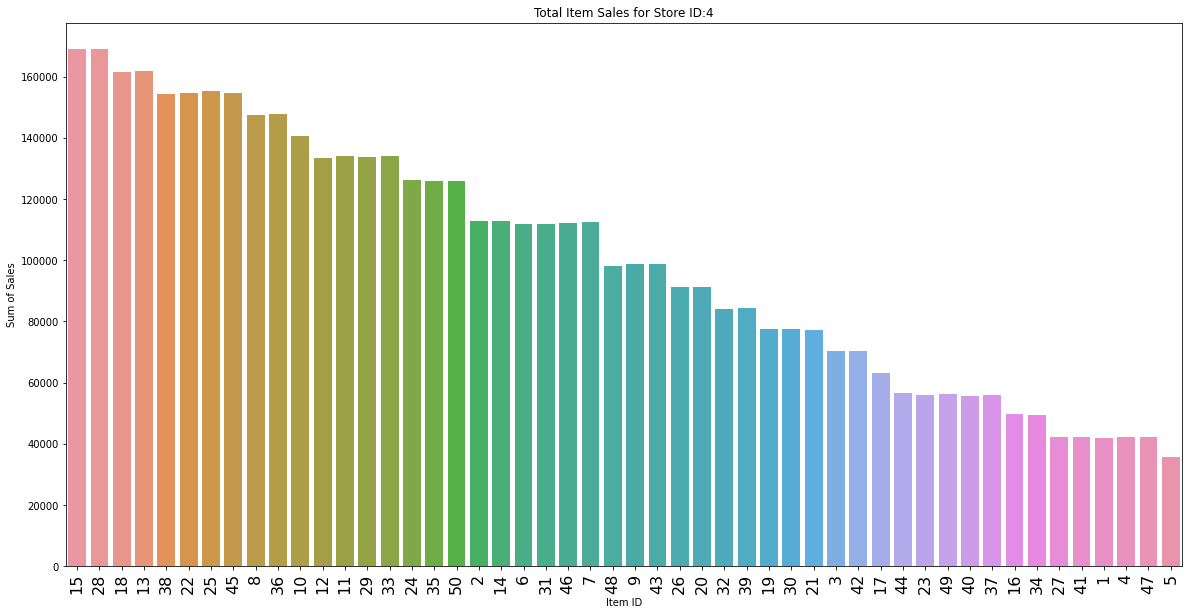

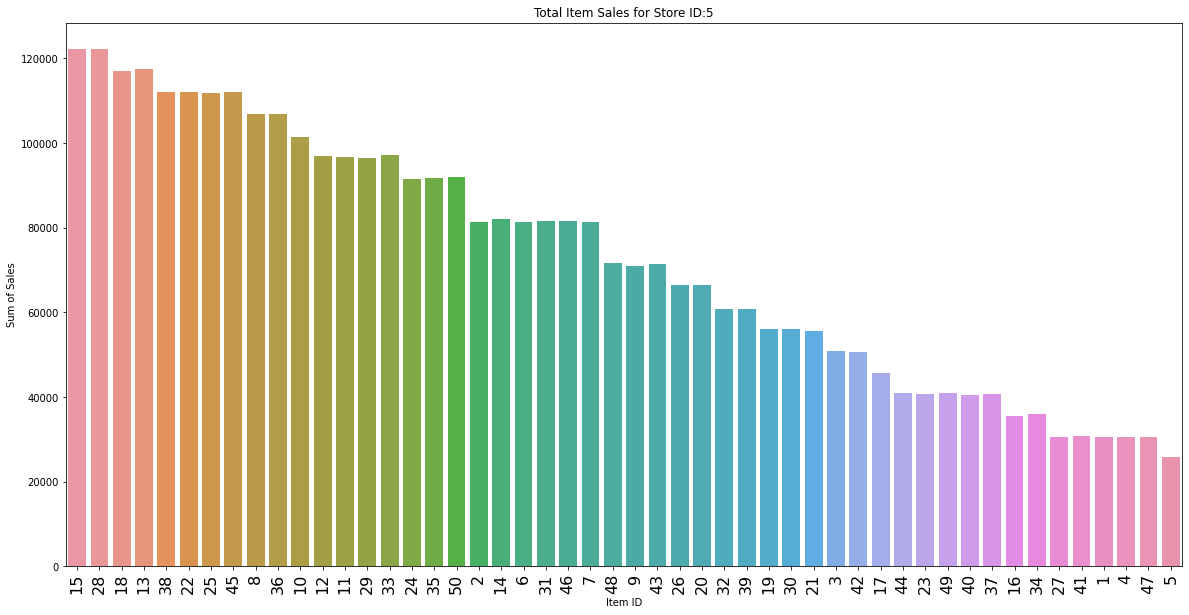

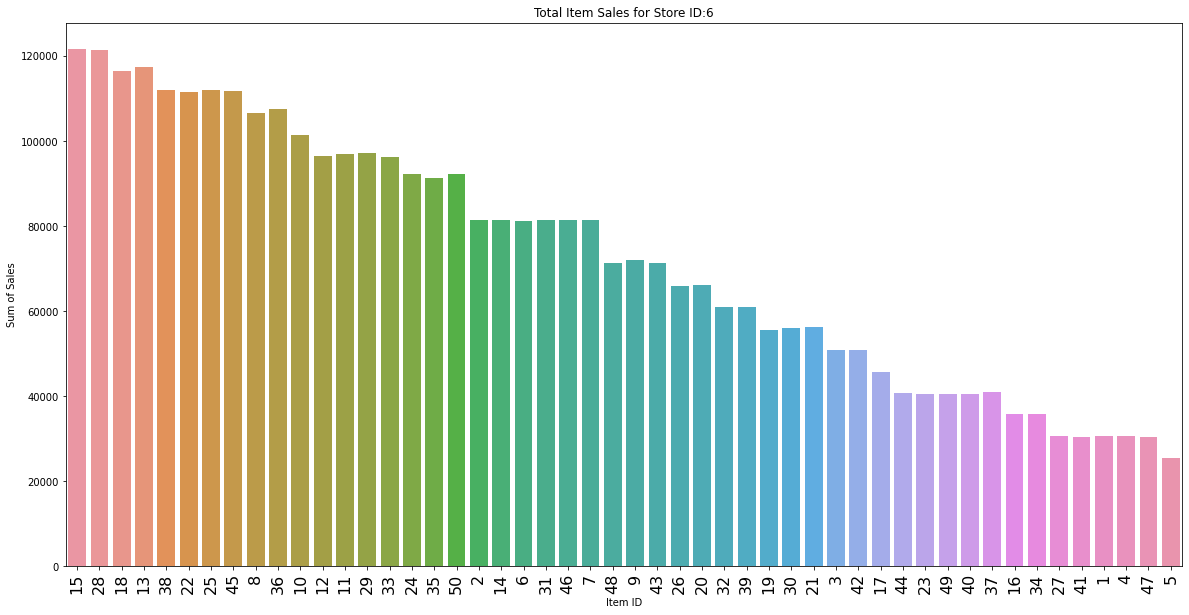

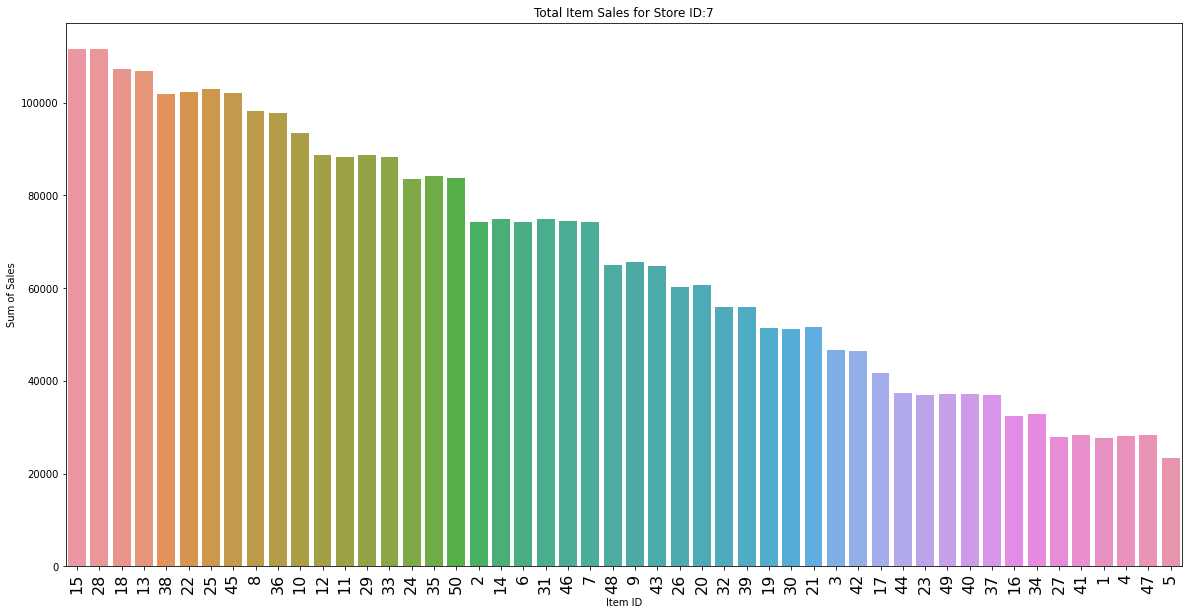

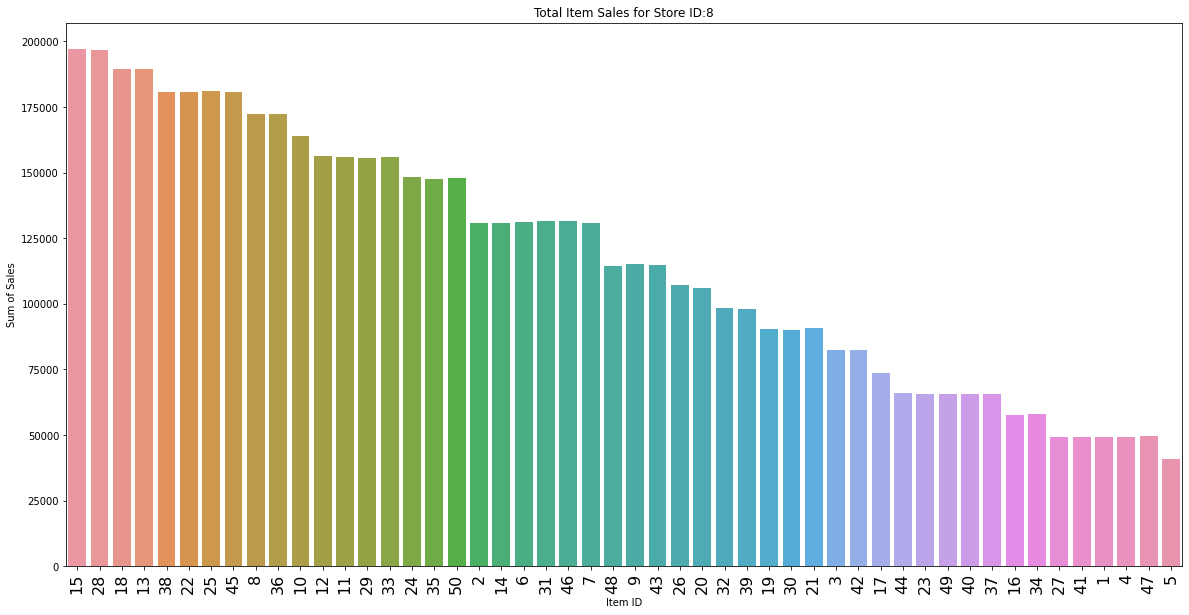

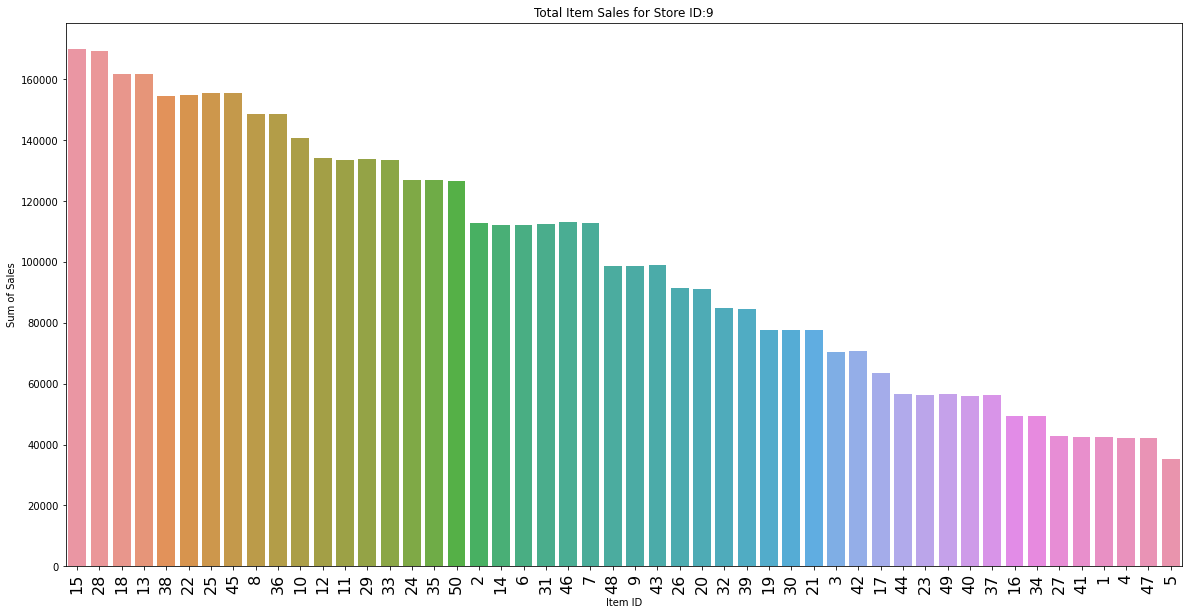

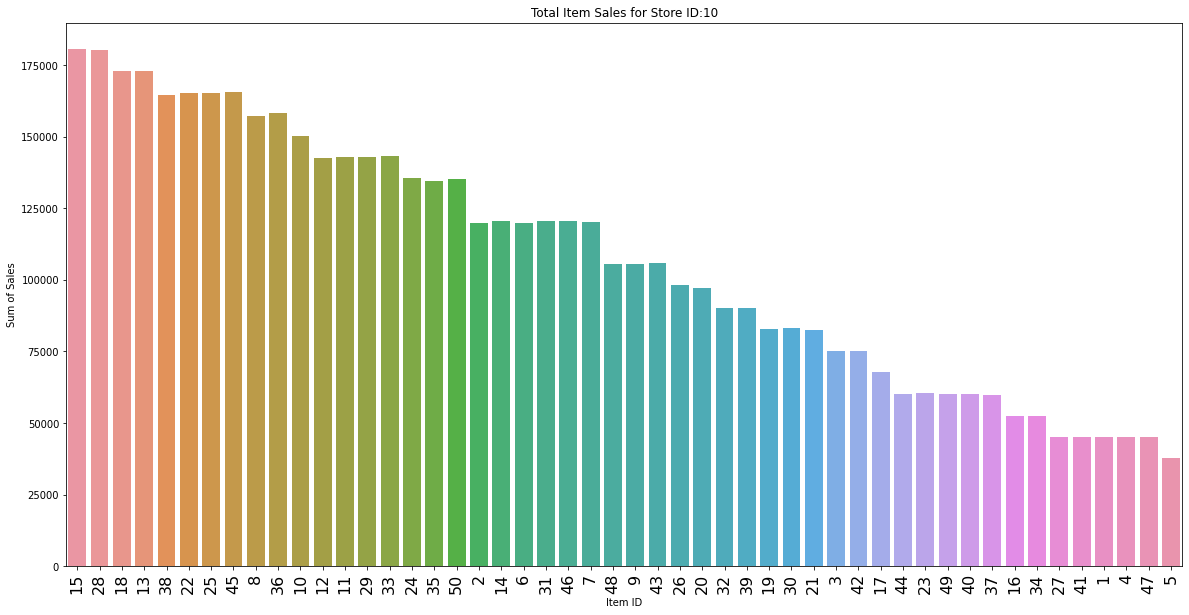

In [117]:
for i in df.store.unique():
  plt.figure(figsize=(20,10))
  sn.barplot(x = 'item', y = 'sales', data= item_sales_per_store.loc[item_sales_per_store.store==i], 
                order=item_sales_per_store.loc[item_sales_per_store.store==1].sort_values('sales', ascending = False).item)
  plt.xlabel('Item ID')
  plt.ylabel("Sum of Sales")
  plt.title("Total Item Sales for Store ID:{}".format(i))
  plt.xticks(fontsize=16, rotation=90)
  plt.show();

**Feature Engineering**

In [118]:
def create_date_time_features(df):
    df = df.copy()
    date = pd.to_datetime(df.date)
    df['month'] = df.date.dt.month
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    df['day_of_week'] = df.date.dt.weekday
    df['year'] = df.date.dt.year
    df['quarter'] = df.date.dt.quarter
    df["is_wknd"] = (df.date.dt.weekday > 4).astype(int)
    df['is_month_start'] = df.date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.date.dt.is_month_end.astype(int)
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [119]:
df1= create_date_time_features(df)
df1.head(5)

<ipython-input-118-2613d876bcf4>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df.date.dt.weekofyear


,date,store,item,sales,id,month,day_of_month,day_of_year,week_of_year,day_of_week,year,quarter,is_wknd,is_month_start,is_month_end,season
0,2013-01-01,1,1,13.0,NaN,1,1,1,1,1,2013,1,0,1,0,0
1,2013-01-02,1,1,11.0,NaN,1,2,2,1,2,2013,1,0,0,0,0
2,2013-01-03,1,1,14.0,NaN,1,3,3,1,3,2013,1,0,0,0,0
3,2013-01-04,1,1,13.0,NaN,1,4,4,1,4,2013,1,0,0,0,0
4,2013-01-05,1,1,10.0,NaN,1,5,5,1,5,2013,1,1,0,0,0


In [120]:
df1.groupby(["store", "item", "month"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
                      sum       mean median        std
store item month                                      
1     1    1       2125.0  13.709677   13.0   4.397413
           2       2063.0  14.631206   14.0   4.668146
           3       2728.0  17.600000   17.0   4.545013
           4       3118.0  20.786667   20.0   4.894301
           5       3448.0  22.245161   22.0   6.564705
...                   ...        ...    ...        ...
10    50   8      13108.0  84.567742   85.0  15.676527
           9      11831.0  78.873333   79.0  15.207423
           10     11322.0  73.045161   72.0  14.209171
           11     11549.0  76.993333   77.0  16.253651
           12      8724.0  56.283871   56.0  11.782529

[6000 rows x 4 columns]

In [121]:
df1.groupby(["store", "item", "year"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
                     sum       mean median        std
store item year                                      
1     1    2013   6025.0  16.506849   16.0   5.568069
           2014   6889.0  18.873973   19.0   5.910087
           2015   7507.0  20.567123   20.0   6.859982
           2016   7950.0  21.721311   22.0   6.691965
           2017   8097.0  22.183562   22.0   6.953278
...                  ...        ...    ...        ...
10    50   2014  25927.0  71.032877   70.0  17.430364
           2015  27081.0  74.194521   74.0  19.141405
           2016  29452.0  80.469945   82.0  18.974328
           2017  30260.0  82.904110   81.0  20.644136
           2018      0.0        NaN    NaN        NaN

[3000 rows x 4 columns]

**Lag features and window features**

Catching the trend, seasonality, and level is our primary objective.

Since this span of time is three months long, we have added it in multiples of three months, such as three months plus one week, three months plus two weeks, six months, etc.

In [122]:
lags   = [91, 180, 365, 546]
def lag_features(df, lags):
    for lag in lags:
        value = df.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(lag))
        df['sales_lag_' + str(lag)] = value
    return df

new_df= lag_features(df1, lags)
new_df.head(5)

,date,store,item,sales,id,month,day_of_month,day_of_year,week_of_year,day_of_week,year,quarter,is_wknd,is_month_start,is_month_end,season,sales_lag_91,sales_lag_180,sales_lag_365,sales_lag_546
0,2013-01-01,1,1,13.0,NaN,1,1,1,1,1,2013,1,0,1,0,0,NaN,NaN,NaN,NaN
1,2013-01-02,1,1,11.0,NaN,1,2,2,1,2,2013,1,0,0,0,0,NaN,NaN,NaN,NaN
2,2013-01-03,1,1,14.0,NaN,1,3,3,1,3,2013,1,0,0,0,0,NaN,NaN,NaN,NaN
3,2013-01-04,1,1,13.0,NaN,1,4,4,1,4,2013,1,0,0,0,0,NaN,NaN,NaN,NaN
4,2013-01-05,1,1,10.0,NaN,1,5,5,1,5,2013,1,1,0,0,0,NaN,NaN,NaN,NaN


**Rolling Mean Features**

The rolling method is used to derive the moving average feature.

In [123]:
def roll_mean_features(df, windows):
    for window in windows:
        value = df.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
        df['sales_roll_mean_' + str(window)] = value
    return df
new_df= roll_mean_features(new_df, [365, 546])

**Exponentially Weighted Mean Features**

Now, we will create features with exponential moving average values corresponding to different alpha values.

In [124]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["store", "item"])['sales'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe
alphas = [0.9, 0.8, 0.7, 0.5]
new_df= ewm_features(new_df, alphas, lags)
new_df.tail(2)

,date,store,item,sales,id,month,day_of_month,day_of_year,week_of_year,day_of_week,...,sales_ewm_alpha_08_lag_365,sales_ewm_alpha_08_lag_546,sales_ewm_alpha_07_lag_91,sales_ewm_alpha_07_lag_180,sales_ewm_alpha_07_lag_365,sales_ewm_alpha_07_lag_546,sales_ewm_alpha_05_lag_91,sales_ewm_alpha_05_lag_180,sales_ewm_alpha_05_lag_365,sales_ewm_alpha_05_lag_546
44998,2018-03-30,10,50,NaN,44998.0,3,30,89,13,4,...,68.550876,82.314892,69.403475,98.791375,68.602440,83.485707,66.038719,96.603586,68.716870,84.936127
44999,2018-03-31,10,50,NaN,44999.0,3,31,90,13,5,...,68.910175,94.062978,64.221042,79.337413,68.880732,92.945712,64.019360,83.801793,68.858435,90.968063


**One Hot Coding**

In [125]:
df2 = pd.get_dummies(new_df, columns=['store', 'item', 'month', 'day_of_week', "quarter", "year", "is_wknd", "is_month_start", "is_month_end", "season"])
df2.shape

(958000, 127)

**Sales Data Logarithmic Transformation**

In [126]:
df2['sales']= np.log1p(df2["sales"].values)
df2.head()

,date,sales,id,day_of_month,day_of_year,week_of_year,sales_lag_91,sales_lag_180,sales_lag_365,sales_lag_546,...,is_wknd_0,is_wknd_1,is_month_start_0,is_month_start_1,is_month_end_0,is_month_end_1,season_0,season_1,season_2,season_3
0,2013-01-01,2.639057,NaN,1,1,1,NaN,NaN,NaN,NaN,...,1,0,0,1,1,0,1,0,0,0
1,2013-01-02,2.484907,NaN,2,2,1,NaN,NaN,NaN,NaN,...,1,0,1,0,1,0,1,0,0,0
2,2013-01-03,2.708050,NaN,3,3,1,NaN,NaN,NaN,NaN,...,1,0,1,0,1,0,1,0,0,0
3,2013-01-04,2.639057,NaN,4,4,1,NaN,NaN,NaN,NaN,...,1,0,1,0,1,0,1,0,0,0
4,2013-01-05,2.397895,NaN,5,5,1,NaN,NaN,NaN,NaN,...,0,1,1,0,1,0,1,0,0,0


In [127]:
df_model= df2.copy()

In [128]:
df_model = df_model.sort_values("date").reset_index(drop = True)

**Splitting Data**

We splitted our data into train and validation sets

In [129]:
train= df_model.loc[(df_model["date"] < "2017-01-01"), :]

val= df_model.loc[(df_model["date"] >= "2017-01-01") & (df_model["date"] < "2017-04-01"), :]

In [130]:
cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]]

In [131]:
X_train = train[cols]
Y_train = train['sales']

X_val = val[cols]
Y_val = val['sales']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((730500, 124), (730500,), (45000, 124), (45000,))

**Buliding & Running LGBM Regressor**

In [132]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def lgbm_smape(y_pred, y_true):
    smape_val = smape(np.expm1(preds), np.expm1(y_true))
    return 'SMAPE', smape_val, False

In [133]:
import lightgbm as lgb

In [134]:
model = lgb.LGBMRegressor()

In [135]:
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score

In [136]:
%%time
first_model= model.fit(X_train, Y_train,
                       eval_metric= lambda y_pred, y_true: [lgbm_smape(y_pred, y_true)])


print("VALID SMAPE:", smape(np.expm1(first_model.predict(X_val)), np.expm1(Y_val)))

print("\tExplained variance:", explained_variance_score(Y_val, first_model.predict(X_val)))
print("\tMean absolute error (MAE):", mean_absolute_error(Y_val, first_model.predict(X_val)))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, first_model.predict(X_val))))
print("\tR2 score:", r2_score(Y_val, first_model.predict(X_val)))

VALID SMAPE: 13.899807304101026
	Explained variance: 0.9010552021291973
	Mean absolute error (MAE): 0.1353032801009127
	Root Mean squared error (RMSE): 0.1780578772225855
	R2 score: 0.8954555165146193
CPU times: user 25.5 s, sys: 901 ms, total: 26.4 s
Wall time: 26.5 s


**Predictions for the Test Data**

In [137]:
df_final_model= df2.copy()
train = df_final_model.loc[~df_final_model.sales.isna()]
Y_train = train['sales']
X_train = train[cols]

test = df_final_model.loc[df_final_model.sales.isna()]
X_test = test[cols]

In [138]:
from time import time

In [139]:
start = time()
lgbm_params= {'learning_rate': 0.1, 
             'max_depth': 3, 
             'n_estimators': 100,
             'num_iterations': 1000,
             "verbose": 100
             }

lgbmtrain_all= lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)

test_model= lgb.train(lgbm_params, lgbmtrain_all)

train_time = time() - start
#*************************************
start = time()
test_preds = test_model.predict(X_test)
predict_time = time()-start

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [140]:
submission_df = test.loc[:, ['id', 'sales']]
submission_df['sales'] = np.expm1(test_preds)
submission_df['id'] = submission_df.id.astype(int)
submission_df.head()

,id,sales
0,0,11.658979
1,1,14.080849
2,2,14.070544
3,3,14.822880
4,4,15.758857


In [141]:
submission_df = test.loc[:, ['id', 'sales']]
submission_df['sales'] = np.expm1(test_preds)
submission_df['id'] = submission_df.id.astype(int)
submission_df.head()

,id,sales
0,0,11.658979
1,1,14.080849
2,2,14.070544
3,3,14.822880
4,4,15.758857


**2nd Model XGBoost Run**

In [142]:
import xgboost as xgb

In [143]:
model2 = xgb.XGBRegressor()

In [144]:
def xgb_smape(y_pred, y_true):
    smape_val = smape(np.expm1(preds), np.expm1(y_true))
    return 'SMAPE', smape_val, False
second_model= model2.fit(X_train, Y_train,
                       eval_metric= lambda y_pred, y_true: [xgb_smape(y_pred, y_true)])


print("VALID SMAPE:", smape(np.expm1(second_model.predict(X_val)), np.expm1(Y_val)))

print("\tExplained variance:", explained_variance_score(Y_val, second_model.predict(X_val)))
print("\tMean absolute error (MAE):", mean_absolute_error(Y_val, second_model.predict(X_val)))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, second_model.predict(X_val))))
print("\tR2 score:", r2_score(Y_val, second_model.predict(X_val)))

[15:08:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
VALID SMAPE: 13.74630582769145
	Explained variance: 0.8994436324759796
	Mean absolute error (MAE): 0.13376465393090994
	Root Mean squared error (RMSE): 0.1756543968660799
	R2 score: 0.8982588156673321
